In [1]:
%matplotlib inline
import numpy as np
import openmc

In [30]:
#create materials

#fuel
fuel = openmc.Material(1, "Am242m")
fuel.add_nuclide('Am242_m1',1)
fuel.set_density('g/cm3', .136) #low density to simulate dispersed particles
print(fuel)

#fuel with realistic enrichment
fuel2 = openmc.Material(11, "Am242m less enriched")
fuel2.add_nuclide('Am242_m1', .2)
fuel2.add_nuclide('Am241', .8)
fuel2.set_density('g/cm3', 13.6)
print(fuel2)

#moderator
BeO = openmc.Material(2, "BeO")
BeO.add_nuclide("Be9", .5)
BeO.add_nuclide("O16", .5)
BeO.set_density("g/cm3", 2.86)
print(BeO)

#moderator2
LiD = openmc.Material(3, "LiD")
LiD.add_nuclide("Li7", .5)
LiD.add_nuclide("H2", .49)
LiD.add_nuclide("H1", .01)
LiD.set_density("g/cm3", .9238)
print(LiD)

#graphite
#gra = openmc.Material(4, "C12")
#gra.add_nuclide("c_Graphite", 1.0)
#gra.set_density("g/cm3", 2.266)
#print(gra)

#zirconium deuteride moderator
ZrD2 = openmc.Material(5, "ZrD2")
ZrD2.add_nuclide("Zr91", .33)
ZrD2.add_nuclide("H2", .66)
ZrD2.add_nuclide("H1", .01)
ZrD2.set_density("g/cm3", 5.6)
print(ZrD2)

#titanium deuteride moderator
TiD2 = openmc.Material(6, "TiD2")
TiD2.add_element("Ti", .33)
TiD2.add_nuclide("H2", .66)
TiD2.add_nuclide("H1", .01)
TiD2.set_density('g/cm3', 3.76)
print(TiD2)

#Be moderator
Be = openmc.Material(7, "Be")
Be.add_nuclide("Be9", 1.0)
Be.set_density("g/cm3", 1.85)
print(Be)

#cerium deuteride moderator
CeD3 = openmc.Material(8, "CeD3")
CeD3.add_element("Ce", .25)
CeD3.add_nuclide("H2", .75)
CeD3.set_density("g/cm3", 5.565)

#"vacuum"
vac = openmc.Material(10, "H1")
vac.add_nuclide('H1',1.0)
vac.set_density('g/cm3',0.0000001)
print(vac)

#reflector
#may add a reflector in the future. for now just BeO moderator

Material
	ID             =	1
	Name           =	Am242m
	Temperature    =	None
	Density        =	0.136 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Am242_m1       =	1            [ao]

Material
	ID             =	11
	Name           =	Am242m less enriched
	Temperature    =	None
	Density        =	13.6 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Am242_m1       =	0.2          [ao]
	Am241          =	0.8          [ao]

Material
	ID             =	2
	Name           =	BeO
	Temperature    =	None
	Density        =	2.86 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Be9            =	0.5          [ao]
	O16            =	0.5          [ao]

Material
	ID             =	3
	Name           =	LiD
	Temperature    =	None
	Density        =	0.9238 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Li7            =	0.5          [ao]
	H2             =	0.49         [ao]
	H1             =	0.01         [ao]

Material
	ID             =	5
	Name           =	ZrD2
	Temperature    =	None
	Density        =	5.6 [g/cm3]
	S(a,b) Tables  
	Nucli

/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=11.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=6.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.

In [69]:
# Outer radius of fuel disk
fuel_rad = 50 #50cm fuel outer radius
fuel_thickness = 5 #5 cm of fuel particles dispersed in aerogel

# parameters for depth of various things
depth = 50 #20 cm tall moderator shell
thickness = 10 # thick shell
gap = 20 #20cm gap between disk and moderator wall
opening = 10 #give 10 cm to decrease fragment absorption my moderator shell

In [70]:
#define a cell surface for a single fuel cylinder
outer_cyl = openmc.ZCylinder(R=fuel_rad+gap+thickness, boundary_type="vacuum")
inner_cyl = openmc.ZCylinder(R=fuel_rad+gap, boundary_type = 'transmission')
bottom_plane_lower = openmc.ZPlane(z0 = 0, boundary_type='vacuum')
bottom_plane_upper = openmc.ZPlane(z0 = thickness, boundary_type='transmission')
top_plane_lower = openmc.ZPlane(z0 = thickness+depth, boundary_type='transmission')
top_plane_upper = openmc.ZPlane(z0 = 2*thickness+depth, boundary_type='vacuum')
bottom_disk_out = openmc.ZCylinder(R=fuel_rad+gap+thickness, boundary_type='vacuum')
bottom_disk_inn = openmc.ZCylinder(R=fuel_rad+opening, boundary_type='transmission')
upper_disk = openmc.ZCylinder(R = fuel_rad+gap+thickness, boundary_type='vacuum')
fuel_outer = openmc.ZCylinder(R=fuel_rad, boundary_type='transmission')
fuel_lower = openmc.ZPlane(z0=(thickness+depth/2-fuel_thickness/2), boundary_type='transmission')
fuel_upper = openmc.ZPlane(z0=(thickness+depth/2+fuel_thickness/2), boundary_type='transmission')

outer_mod = +inner_cyl & -outer_cyl & +bottom_plane_upper & -top_plane_lower
lower_mod = -bottom_disk_out & +bottom_disk_inn & +bottom_plane_lower & -bottom_plane_upper
upper_mod = -upper_disk & +top_plane_lower & -top_plane_upper
fuel_region = -fuel_outer & -fuel_upper & +fuel_lower
mod_region = outer_mod | lower_mod | upper_mod
vac_region = ~mod_region & ~fuel_region

#fill the fuel region
f=openmc.Cell(1, 'fuel')
f.fill=fuel
f.region=fuel_region

#fill the moderator regions
m = openmc.Cell(2, 'moderator region')
m.fill=Be
m.region=mod_region

#fill vacuum
v = openmc.Cell(3, 'vacuum')
v.fill=vac
v.region=vac_region

/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)
/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Cell instance already exists with id=3.
  warn(msg, IDWarning)


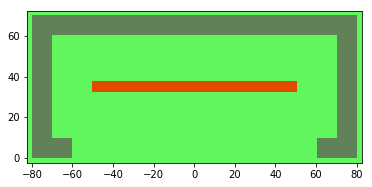

In [71]:
#visualize the fuel geometry
univ = openmc.Universe(cells=[f, m, v])
univ.plot(width=(2*(fuel_rad+gap+thickness)+5, depth+2*thickness+5), origin = (0,0,depth/2 + thickness), basis='xz')

In [72]:
#create root universe
geom = openmc.Geometry()
geom.root_universe = univ

#configure statistics geometry
#source = openmc.stats.Box((-20, -20, 0), (20, 20, fuel_depth))
source = openmc.stats.Point((0,0,thickness+(depth+fuel_thickness)/2))
src = openmc.Source(space=source)

#export geometry
geom.export_to_xml()

In [73]:
#create materials & cross sections xmls
mats = openmc.Materials()
mats.cross_sections = '/home/james/nndc_hdf5/cross_sections.xml' #comment this out/replace if you need to
mats.append(fuel)
mats += [fuel2]
mats += [BeO]
mats += [LiD]
#mats += [gra]
mats += [ZrD2]
mats += [TiD2]
mats += [Be]
mats += [CeD3]
mats += [vac]

#export materials
mats.export_to_xml()

In [74]:
settings = openmc.Settings()
settings.particles = 1000
settings.batches = 20
settings.inactive = 10
settings.source = src
settings.export_to_xml()

In [75]:
#configure tallies
cell_filter = openmc.CellFilter(f)
t = openmc.Tally(4)
t.filters = [cell_filter]
t.scores = ['fission']
tallies = openmc.Tallies([t])

#export tallies
tallies.export_to_xml()

/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Tally instance already exists with id=4.
  warn(msg, IDWarning)


In [76]:
openmc.run()

openmc: Relink `/home/james/anaconda3/bin/../lib/./libgfortran.so.4' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'

                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               ####################

0